（副読本）
* ニールセン・チャン「量子コンピュータと量子通信」（ここでは N,C"QCQI" と書きます）
* arXivに公開されている論文

In [1]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit, QubitBra, measure_all, measure_all_oneshot,measure_partial, matrix_to_qubit
from sympy.physics.quantum.gate import H,X,Y,Z,S,T,CPHASE,CNOT,SWAP,UGate,CGateS,gate_simp,OneQubitGate
from sympy.physics.quantum.gate import IdentityGate as _I
%matplotlib inline
import matplotlib.pyplot as plt
from sympy.physics.quantum.circuitplot import CircuitPlot,labeller, Mz,CreateOneQubitGate
def CCX(c1,c2,t):  return CGateS((c1,c2),X(t))

# 6. 量子コンピュータのエラー訂正

## 6.1 符号化と論理ビット


$ 0_L := 000 $
$ 1_L := 111 $

* 符号語
* 符号距離

## 6.2 パリティチェックでエラーを見つける

$ \lvert 0_L \rangle := \lvert 000 \rangle $

$ \lvert 1_L \rangle := \lvert 111 \rangle $


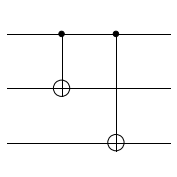

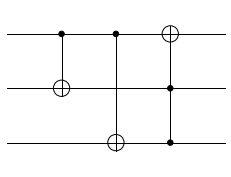

In [2]:
fugou=CNOT(2,0)*CNOT(2,1)
fukugou = CCX(0,1,2)*CNOT(2,0)*CNOT(2,1)
CircuitPlot(fugou, nqubits=3)
CircuitPlot(fukugou, nqubits=3)

In [3]:
qapply(fugou*Qubit("000"))

|000>

In [4]:
qapply(fugou*Qubit("100"))

|111>

In [5]:
# 復号

In [6]:
qapply(fukugou*Qubit("000"))

|000>

In [7]:
qapply(fukugou*Qubit("010"))

|010>

In [8]:
qapply(fukugou*Qubit("001"))

|001>

In [9]:
qapply(fukugou*Qubit("100"))

|011>

In [10]:
qapply(fukugou*Qubit("110"))

|101>

In [11]:
qapply(fukugou*Qubit("101"))

|110>

In [12]:
qapply(fukugou*Qubit("011"))

|111>

In [13]:
qapply(fukugou*Qubit("111"))

|100>

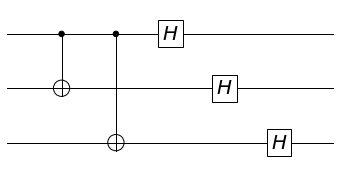

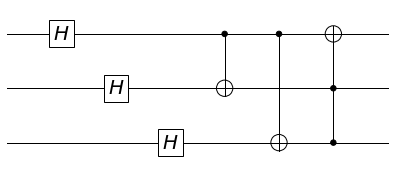

In [14]:
ph_fugou=H(0)*H(1)*H(2)*CNOT(2,0)*CNOT(2,1)
ph_fukugou = CCX(0,1,2)*CNOT(2,0)*CNOT(2,1)*H(0)*H(1)*H(2)
CircuitPlot(ph_fugou, nqubits=3)
CircuitPlot(ph_fukugou, nqubits=3)

$ \lvert 0_L \rangle := \lvert +++ \rangle $

In [15]:
qapply(ph_fugou*Qubit("000"))

sqrt(2)*|000>/4 + sqrt(2)*|001>/4 + sqrt(2)*|010>/4 + sqrt(2)*|011>/4 + sqrt(2)*|100>/4 + sqrt(2)*|101>/4 + sqrt(2)*|110>/4 + sqrt(2)*|111>/4

$ \lvert 1_L \rangle := \lvert --- \rangle $

In [16]:
qapply(ph_fugou*Qubit("100"))

sqrt(2)*|000>/4 - sqrt(2)*|001>/4 - sqrt(2)*|010>/4 + sqrt(2)*|011>/4 - sqrt(2)*|100>/4 + sqrt(2)*|101>/4 + sqrt(2)*|110>/4 - sqrt(2)*|111>/4

## 6.3 ビット・位相反転の両方に対応する（ショアの符号）

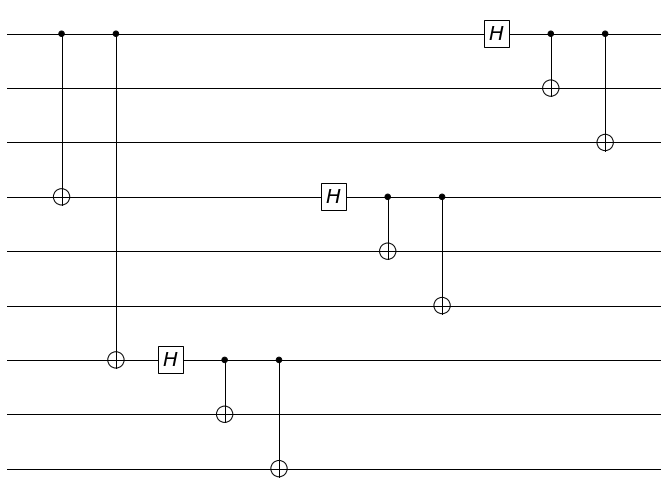

In [17]:
shor_fugou=CNOT(8,6)*CNOT(8,7)*H(8)*CNOT(5,3)*CNOT(5,4)*H(5)*CNOT(2,0)*CNOT(2,1)*H(2)*CNOT(8,2)*CNOT(8,5)
CircuitPlot(shor_fugou, nqubits=9)

In [18]:
Qubit("0"*9)

|000000000>

In [19]:
qapply(shor_fugou*Qubit("0"*9))

sqrt(2)*|000000000>/4 + sqrt(2)*|000000111>/4 + sqrt(2)*|000111000>/4 + sqrt(2)*|000111111>/4 + sqrt(2)*|111000000>/4 + sqrt(2)*|111000111>/4 + sqrt(2)*|111111000>/4 + sqrt(2)*|111111111>/4

In [20]:
Qubit("1"+"0"*8)

|100000000>

In [21]:
qapply(shor_fugou*Qubit("1"+"0"*8))

sqrt(2)*|000000000>/4 - sqrt(2)*|000000111>/4 - sqrt(2)*|000111000>/4 + sqrt(2)*|000111111>/4 - sqrt(2)*|111000000>/4 + sqrt(2)*|111000111>/4 + sqrt(2)*|111111000>/4 - sqrt(2)*|111111111>/4

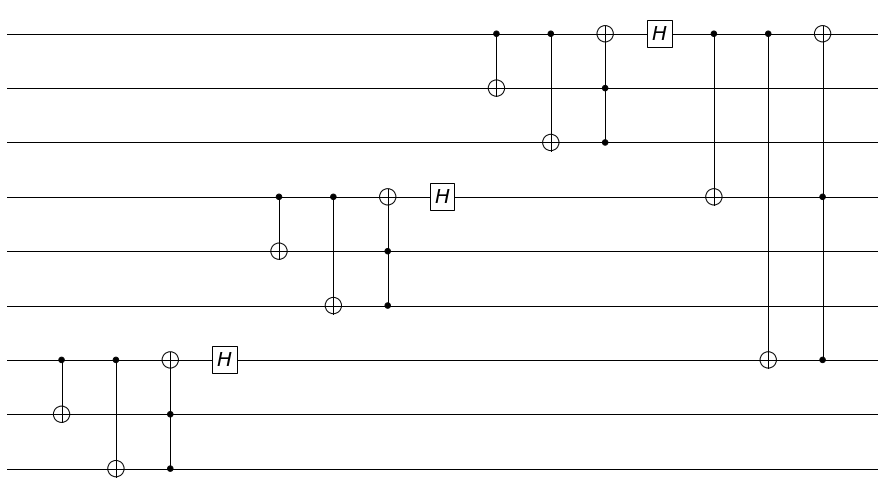

In [22]:
shor_fukugou = CCX(2,5,8)*CNOT(8,2)*CNOT(8,5)*H(8)*CCX(6,7,8)*CNOT(8,6)*CNOT(8,7)*H(5)*CCX(3,4,5)*CNOT(5,3)*CNOT(5,4)*H(2)*CCX(0,1,2)*CNOT(2,0)*CNOT(2,1)
CircuitPlot(shor_fukugou, nqubits=9)

## 6.4 量子誤り訂正符号の標準的な作り方

### 6.4.1 スタビライザ形式とは？

符号化の考え方の発想転換

$ 2^n$ 個の係数で量子ビットの状態を表す

↓

ある演算子　$ U $ の固有値が $ \lambda $ になる状態として表す

**スタビライザ形式**

あるスタビライザ群 $ S $ の要素となる演算の固有値が $ \pm1 $ である量子状態　：＝　『スタビライザ状態』

その演算子　：＝『スタビライザ（演算子）』

スタビライザの固有値の測定結果の集合　：＝『シンドローム』